In [1]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
#A. Finding Roots of the Equations:

In [3]:
#q1

In [4]:
def f(x):
    return x*x - np.sin(x)

In [5]:
tab = PrettyTable()
a = 0.5
b = 1
eps = 0.0001
tab.field_names = ["Step", "a","b","x","f(x)"]
i =0 

In [6]:
while (f(a)*f(b)<0):
    x = (a+b)/2
    tab.add_row([i,"%.4f"%a,"%.4f"%b,"%.4f"%x,"%.4f"%f(x)])
    i = i+1
    if (f(x) == 0):
        break
    elif (f(x)*f(a)<0):
        b = x
        if(abs(a-x)<eps):
            break
    else:
        a = x
        if(abs(b-x)<eps):
            break

In [7]:
print(tab)

+------+--------+--------+--------+---------+
| Step |   a    |   b    |   x    |   f(x)  |
+------+--------+--------+--------+---------+
|  0   | 0.5000 | 1.0000 | 0.7500 | -0.1191 |
|  1   | 0.7500 | 1.0000 | 0.8750 | -0.0019 |
|  2   | 0.8750 | 1.0000 | 0.9375 |  0.0728 |
|  3   | 0.8750 | 0.9375 | 0.9062 |  0.0341 |
|  4   | 0.8750 | 0.9062 | 0.8906 |  0.0157 |
|  5   | 0.8750 | 0.8906 | 0.8828 |  0.0068 |
|  6   | 0.8750 | 0.8828 | 0.8789 |  0.0024 |
|  7   | 0.8750 | 0.8789 | 0.8770 |  0.0003 |
|  8   | 0.8750 | 0.8770 | 0.8760 | -0.0008 |
|  9   | 0.8760 | 0.8770 | 0.8765 | -0.0003 |
|  10  | 0.8765 | 0.8770 | 0.8767 | -0.0000 |
|  11  | 0.8767 | 0.8770 | 0.8768 |  0.0001 |
|  12  | 0.8767 | 0.8768 | 0.8768 |  0.0000 |
+------+--------+--------+--------+---------+


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [8]:
#q2

In [9]:
def f(x):
    return (4*x - np.exp(x))

In [10]:
def f1(x):
    return (4 - np.exp(x))

In [11]:
x0 = 1
eps = 0.0001
a= eps+1
t = PrettyTable()

In [12]:
t.field_names = ["Step", "Xi","f(Xi)"]
i = 0
while abs(a)>eps:
    t.add_row([i, "%.4f"%x0, "%.4f"%f(x0)])
    i = i+1
    a = f(x0) / f1(x0) 
    x0 = x0 - a

In [13]:
print(t)

+------+--------+---------+
| Step |   Xi   |  f(Xi)  |
+------+--------+---------+
|  0   | 1.0000 |  1.2817 |
|  1   | 0.0000 | -1.0000 |
|  2   | 0.3333 | -0.0623 |
|  3   | 0.3572 | -0.0004 |
|  4   | 0.3574 | -0.0000 |
+------+--------+---------+


<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [14]:
#B. Interpolation

In [15]:
class Values:
    def __init__(self, x_values, y_values):
        self.n = len(x_values)
        self.table = [[0 for i in range(self.n+1)] for j in range(self.n)]
        for i in range(self.n):
            self.table[i][0] = x_values[i]
            self.table[i][1] = y_values[i]

    def forward(self):
        for j in range(2, self.n+1):
            for i in range(self.n-j+1):
                self.table[i][j] = self.table[i+1][j-1] - self.table[i][j-1]
        Table = PrettyTable()
        field_names = ["x", "y"]
        for i in range(2, self.n+1):
            field_names.append("Del"+str(i-1)+"y")
        Table.field_names = field_names
        for i in range(self.n):
            row = [round(self.table[i][0],4), round(self.table[i][1],4)]
            for j in range(2, self.n+1):
                if i > self.n-j:
                    row.append(" ")
                else:
                    row.append(round(self.table[i][j],4))
            Table.add_row(row)
        print(Table)
        
    def backward(self):
        for j in range(2, self.n+1):
            for i in range(j-1, self.n):
                self.table[i][j] = self.table[i][j-1] - self.table[i-1][j-1]
        Table = PrettyTable()
        field_names = ["x", "y"]
        for i in range(2, self.n+1):
            field_names.append("nabla"+str(i-1)+"y")
        Table.field_names = field_names
        for i in range(self.n):
            row = [round(self.table[i][0],4), round(self.table[i][1],4)]
            for j in range(2, self.n+1):
                if i < j-1:
                    row.append(" ")
                else:
                    row.append(round(self.table[i][j],4))
            Table.add_row(row)
        print(Table)
        
    def central(self):
        forward(self)  

In [16]:
#q3

In [17]:
x= np.linspace(-1,1,21)
y = np.exp(x)
tab = Values(x, y)
tab.forward()

+------+--------+--------+--------+--------+--------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|  x   |   y    | Del1y  | Del2y  | Del3y  | Del4y  | Del5y | Del6y | Del7y | Del8y | Del9y | Del10y | Del11y | Del12y | Del13y | Del14y | Del15y | Del16y | Del17y | Del18y | Del19y | Del20y |
+------+--------+--------+--------+--------+--------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| -1.0 | 0.3679 | 0.0387 | 0.0041 | 0.0004 |  0.0   |  0.0  |  0.0  |  0.0  |  0.0  |  0.0  |  0.0   |  0.0   |  0.0   |  -0.0  |  0.0   |  -0.0  |  0.0   |  -0.0  |  0.0   |  -0.0  |  0.0   |
| -0.9 | 0.4066 | 0.0428 | 0.0045 | 0.0005 |  0.0   |  0.0  |  0.0  |  0.0  |  0.0  |  0.0  |  0.0   |  0.0   |  0.0   |  0.0   |  -0.0  |  0.0   |  -0.0  |  0.0   |  -0.0  |  0.0   |        |
| -0.8 | 0.4493 | 0.0473 | 0.005  |

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [18]:
#q4

In [19]:
x = [0.20 ,0.22 ,0.24 ,0.26 ,0.28 ,0.30]
y = [1.6596 ,1.6698, 1.6804, 1.6912, 1.7024, 1.7139]
tab = Values(x,y)
tab.forward()

+------+--------+--------+--------+---------+---------+---------+
|  x   |   y    | Del1y  | Del2y  |  Del3y  |  Del4y  |  Del5y  |
+------+--------+--------+--------+---------+---------+---------+
| 0.2  | 1.6596 | 0.0102 | 0.0004 | -0.0002 |  0.0004 | -0.0007 |
| 0.22 | 1.6698 | 0.0106 | 0.0002 |  0.0002 | -0.0003 |         |
| 0.24 | 1.6804 | 0.0108 | 0.0004 | -0.0001 |         |         |
| 0.26 | 1.6912 | 0.0112 | 0.0003 |         |         |         |
| 0.28 | 1.7024 | 0.0115 |        |         |         |         |
| 0.3  | 1.7139 |        |        |         |         |         |
+------+--------+--------+--------+---------+---------+---------+


In [20]:
X = 0.21
h = x[1]-x[0]
p = (X-x[0])/h
Y = y[0] + tab.table[2][0]*p+(p*p-p)*0.5*tab.table[3][0]+p*(p-1)*(p-2)*tab.table[4][0]/6
print(Y)

1.7646


In [21]:
x = [0.20 ,0.22 ,0.24 ,0.26 ,0.28 ,0.30]
y = [1.6596 ,1.6698, 1.6804, 1.6912, 1.7024, 1.7139]
tab = Values(x,y)
tab.backward()

+------+--------+---------+---------+---------+---------+---------+
|  x   |   y    | nabla1y | nabla2y | nabla3y | nabla4y | nabla5y |
+------+--------+---------+---------+---------+---------+---------+
| 0.2  | 1.6596 |         |         |         |         |         |
| 0.22 | 1.6698 |  0.0102 |         |         |         |         |
| 0.24 | 1.6804 |  0.0106 |  0.0004 |         |         |         |
| 0.26 | 1.6912 |  0.0108 |  0.0002 | -0.0002 |         |         |
| 0.28 | 1.7024 |  0.0112 |  0.0004 |  0.0002 |  0.0004 |         |
| 0.3  | 1.7139 |  0.0115 |  0.0003 | -0.0001 | -0.0003 | -0.0007 |
+------+--------+---------+---------+---------+---------+---------+


In [22]:
X = 0.29
h = x[1]-x[0]
p = (X-x[5])/h
Y = y[5] + tab.table[2][5]*p+(p*p+p)*0.5*tab.table[3][5]+p*(p+1)*(p+2)*tab.table[4][5]/6
print(Y)

1.713875


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [23]:
#q5

In [24]:
x = [0, 1, 3, 4, 5]
y = [0, 1, 81, 256, 625]

In [25]:
def lagrange(Xval,Yval,x):
    y = 0
    for i in range(len(Xval)):
        n = d = 1
        for j in range(len(Xval)):
            if i != j:
                n = n*(x-Xval[j])
                d = d*(Xval[i]-Xval[j])
        y = y + n*Yval[i]/d
    return(round(y,4))

In [26]:
print(lagrange(x,y,2))

16.0


<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [27]:
#C. Numerical Integration

In [28]:
#q6

In [29]:
def function(x):
    y = np.sin(x)/np.exp(x)
    return y

In [30]:
def trapezoid(f,l,s):#first last step
    x = np.linspace(f,l,s+1)
    I = 0
    for i in range(len(x)):
        if x[i]>f or x[i]<l:
            I += 2*function(x[i])
        else:
            I += function(x[i])
        
    return I * 0.5* (x[1]-x[0])

In [31]:
trapezoid(0,np.pi,20)

0.5194637027711455

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [32]:
#q7

In [33]:
def f1(x):
    y = np.exp(-x*x/2)
    return y

In [34]:
def sim3(f,l,s):#first last step
    x = np.linspace(f,l,s+1)
    I = 0
    for i in range(len(x)):
        if x[i]>f or x[i]<l:
            if i%2 == 0:
                I += 2*f1(x[i])
            else:
                I += 4*f1(x[i])
        else:
            I += f1(x[i])
    I = I*np.sqrt(1/(2*np.pi))
    I = I * (x[1]-x[0])/3
    return I 

In [35]:
sim3(-4,4,50)

0.9999508833741578

<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [36]:
#D. Numerical Differential Equations:

In [37]:
def f1(x):
    return x*x+x

In [38]:
#q8

In [39]:
x = np.linspace(0,2,21)
y = np.zeros(len(x))
h = x[1]-x[0]
y[0]= 1
MT = PrettyTable()
MT.field_names = ["X", "Y"]

In [40]:
MT.add_row([round(x[0],4),round(y[0],4)])
for i in range(1,len(y)):
    y[i] = y[i-1] +h*f1(x[i-1])
    MT.add_row([round(x[i],4),round(y[i],4)])

In [41]:
print(MT)

+-----+-------+
|  X  |   Y   |
+-----+-------+
| 0.0 |  1.0  |
| 0.1 |  1.0  |
| 0.2 | 1.011 |
| 0.3 | 1.035 |
| 0.4 | 1.074 |
| 0.5 |  1.13 |
| 0.6 | 1.205 |
| 0.7 | 1.301 |
| 0.8 |  1.42 |
| 0.9 | 1.564 |
| 1.0 | 1.735 |
| 1.1 | 1.935 |
| 1.2 | 2.166 |
| 1.3 |  2.43 |
| 1.4 | 2.729 |
| 1.5 | 3.065 |
| 1.6 |  3.44 |
| 1.7 | 3.856 |
| 1.8 | 4.315 |
| 1.9 | 4.819 |
| 2.0 |  5.37 |
+-----+-------+


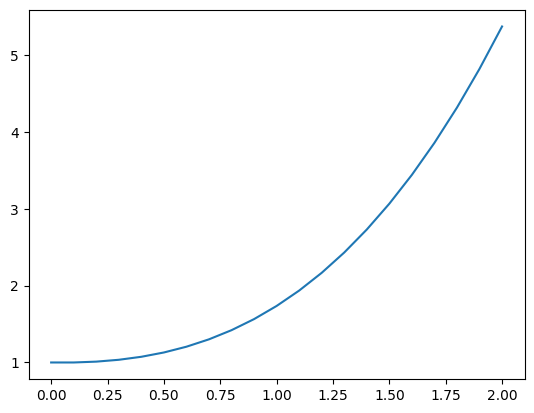

In [42]:
plt.plot(x,y)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [43]:
#q9

In [44]:
x = np.linspace(0,2,11)
y = np.zeros(len(x))
y[0] = 1
MT = PrettyTable()
MT.field_names = ["X", "Y"]

In [45]:
MT.add_row([round(x[0],4),round(y[0],4)])
for i in range(1,len(y)):
    y[i] = y[i-1] + h *  0.5 * (f1(x[i-1]) + f1(x[i-1] + h) )
    MT.add_row([round(x[i],4),round(y[i],4)])

In [46]:
print(MT)

+-----+--------+
|  X  |   Y    |
+-----+--------+
| 0.0 |  1.0   |
| 0.2 | 1.0055 |
| 0.4 | 1.037  |
| 0.6 | 1.1025 |
| 0.8 |  1.21  |
| 1.0 | 1.3675 |
| 1.2 | 1.583  |
| 1.4 | 1.8645 |
| 1.6 |  2.22  |
| 1.8 | 2.6575 |
| 2.0 | 3.185  |
+-----+--------+


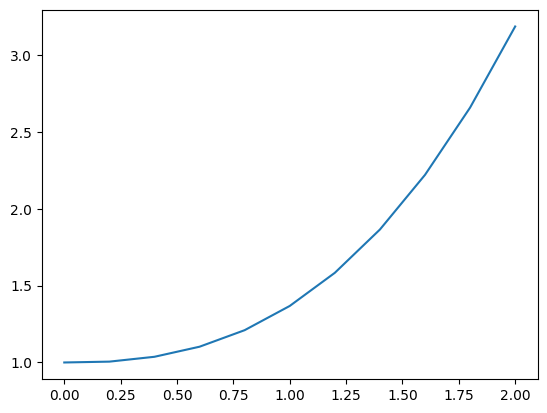

In [47]:
plt.plot(x,y)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [48]:
#q10

In [49]:
x = np.linspace(0, 1, 11)
y = np.zeros(len(x))
y[0] = y[-1] = 0
MT = PrettyTable()
MT.field_names = ["X", "Y"]

In [50]:
A = np.zeros((9, 9))
B = np.zeros(9)
h = x[1] - x[0]
p = -64
q = 0
r = -10

In [51]:
a = 1 - 0.5 * h * p
b = -2 + h * h * q
c = 1 + 0.5 * h * p
d = h*h*r*r

In [52]:
np.fill_diagonal(A, b)
np.fill_diagonal(A[1:], a)
np.fill_diagonal(A[:, 1:], c)
B = np.full(9, d)


B[0] -= a * y[0] 
B[-1] -= c * y[-1] 

In [53]:
y[1:-1] = np.linalg.solve(A, B)

In [54]:
for i in range(len(x)):
    MT.add_row([round(x[i],1), round(y[i],3)])

In [55]:
print(MT)

+-----+--------+
|  X  |   Y    |
+-----+--------+
| 0.0 |  0.0   |
| 0.1 | -0.163 |
| 0.2 | -0.306 |
| 0.3 | -0.488 |
| 0.4 | -0.595 |
| 0.5 | -0.845 |
| 0.6 | -0.822 |
| 0.7 | -1.321 |
| 0.8 | -0.823 |
| 0.9 | -2.228 |
| 1.0 |  0.0   |
+-----+--------+


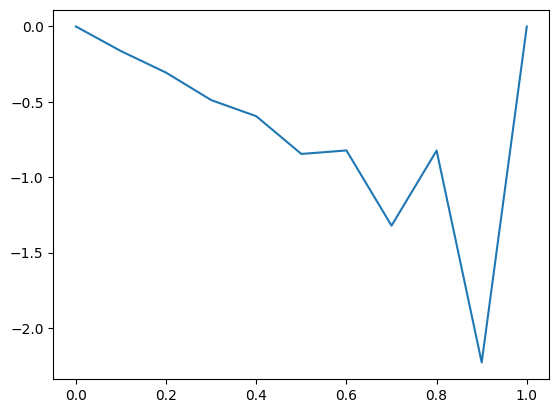

In [56]:
plt.plot(x, y)

<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [57]:
#E. Curve Fitting

In [58]:
#q11

In [59]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2.4, 3.1, 3.5, 4.2, 5.0, 6.0])
m = len(x)

In [60]:
m = len(x)
xy_sum = np.sum(x * y)
x_sum = np.sum(x)
y_sum = np.sum(y)
x_squared_sum = np.sum(x ** 2)

In [61]:
a1 = (m * xy_sum - x_sum * y_sum) / (m * x_squared_sum - x_sum ** 2)
a0 = (y_sum - a1 * x_sum) / m

In [62]:
def y1(x): 
    return a0 + a1 *x 
print(y1(2.5))

3.336190476190475


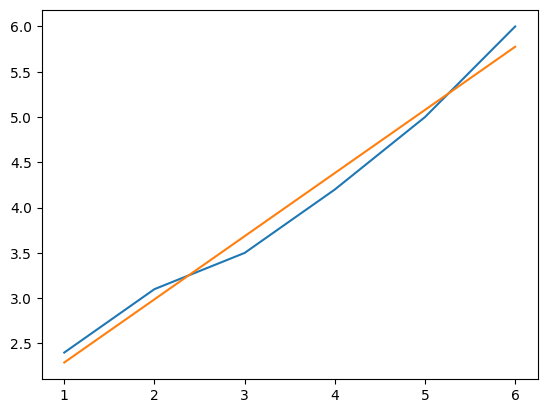

In [63]:
plt.plot(x,y)
plt.plot(x,y1(x))

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

In [64]:
#q12

In [65]:
x = np.array([2,4,6,8,10])
y =  np.array([4.077, 11.084, 30.128, 81.897, 222.62])

In [66]:
Y = np.log(y)
m = len(x)
xY_sum = np.sum(x * Y)
x_sum = np.sum(x)
Y_sum = np.sum(Y)
x_squared_sum = np.sum(x ** 2)

In [67]:
a1 = (m * xY_sum - x_sum * Y_sum) / (m * x_squared_sum - x_sum ** 2)
a0 = (Y_sum - a1 * x_sum) / m

In [68]:
def y2(x):
    Y2 = a0 + a1*x
    return np.exp(Y2)
print(y2(9))

135.027025924343


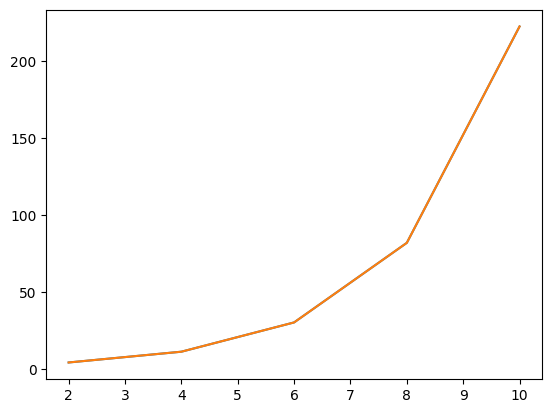

In [71]:
plt.plot(x,y)
plt.plot(x,y2(x))

<hr style="height:2px;border-width:0;color:gray;background-color:gray">
<hr style="height:2px;border-width:0;color:gray;background-color:gray">